## Welcome back!
### This notebook provides the code and workshop material for the Barnard ERC's intermediate introduction to Python 3x.  Today, we will cover:

#### - Importing data
#### - Descriptive Statistics
#### - Graphing in Matplot Lib
#### - Groupby and its applications
#### - Regression
##### .... and implementing these techniques in our own case study!

Keep in mind, there is always more than one way to code something!  If one of these functions doesn't quite meet your needs, stackoverflow is a great place to look for an alternative function or package.

Let's begin by importing some packages we will need and loading our dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This week we return to the course evaluation data from last week.  We begin by adding this into a pandas data frame and getting some preilimary descriptive statistics:

In [2]:
ratings_df = pd.read_csv('teachingratingsexcel.csv')
ratings_df.head()

,minority,age,female,onecredit,beauty,course_eval,intro,nnenglish
0,1,36,1,0,0.289916,4.3,0,0
1,0,59,0,0,-0.737732,4.5,0,0
2,0,51,0,0,-0.571984,3.7,0,0
3,0,40,1,0,-0.677963,4.3,0,0
4,0,31,1,0,1.509794,4.4,0,0


In [3]:
ratings_df.describe()

,minority,age,female,onecredit,beauty,course_eval,intro,nnenglish
count,463.000000,463.000000,463.000000,463.000000,4.630000e+02,463.000000,463.000000,463.000000
mean,0.138229,48.365011,0.421166,0.058315,6.263499e-08,3.998272,0.339093,0.060475
std,0.345513,9.802742,0.494280,0.234592,7.886477e-01,0.554866,0.473913,0.238623
min,0.000000,29.000000,0.000000,0.000000,-1.450494e+00,2.100000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,-6.562689e-01,3.600000,0.000000,0.000000
50%,0.000000,48.000000,0.000000,0.000000,-6.801430e-02,4.000000,0.000000,0.000000
75%,0.000000,57.000000,1.000000,0.000000,5.456024e-01,4.400000,1.000000,0.000000
max,1.000000,73.000000,1.000000,1.000000,1.970023e+00,5.000000,1.000000,1.000000


Let's review some basic graphing using the package matplotlib. This will give us the foundation for more customizable graphs later.

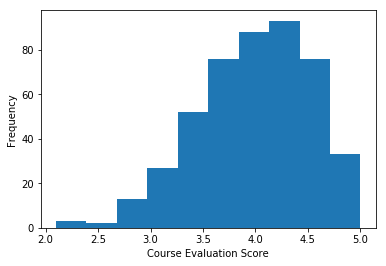

In [4]:
plt.hist(ratings_df['course_eval'], bins=10)
plt.xlabel('Course Evaluation Score')
plt.ylabel('Frequency')
plt.show()

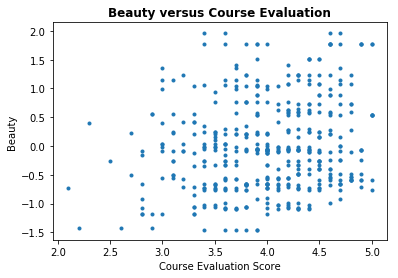

In [5]:
plt.scatter(ratings_df['course_eval'], ratings_df['beauty'], marker=".")
plt.xlabel('Course Evaluation Score')
plt.ylabel('Beauty')
plt.title('Beauty versus Course Evaluation', fontweight="bold")
plt.show()

Let's get more specific, visualizing our distribution by category:

In [6]:
female = ratings_df[ratings_df['female']==1]
male = ratings_df[ratings_df['female']==0]
female_ratings = female.loc[: , "course_eval"]
male_ratings = male.loc[: , "course_eval"]

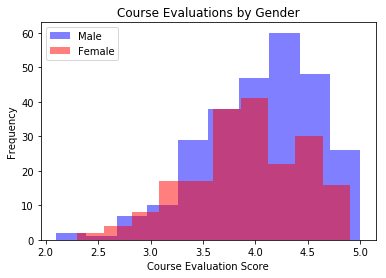

In [7]:
fig, (ax1) = plt.subplots(1, 1)
ax=fig.gca()
ax.hist(male_ratings, bins=10, color='blue', alpha=0.5, label='Male')
ax.hist(female_ratings, bins=10, color='red', alpha=0.5, label='Female')
plt.legend(loc='best')
plt.title('Course Evaluations by Gender')
plt.xlabel('Course Evaluation Score')
plt.ylabel('Frequency')
plt.show()

# Groupby

Groupby is one of the most useful pandas functions.  This allows us to reorient data so we can examine group effects.  Often, Groupby is used to obtain some summary statistic, perform a group-specific operation, or filter data.  Below, we find the mean course evaluation based on gender:

In [8]:
# here we use groupby to obtain a summary statistic
gender_scores_df = ratings_df[['female', 'course_eval']]
gender_scores = gender_scores_df.groupby('female').aggregate(np.mean)
gender_scores

,course_eval
female,
0,4.069030
1,3.901026


In [9]:
ratings_df[['course_eval', 'female']].groupby('female').describe()

course_eval                                              
             count      mean       std  min  25%   50%  75%  max
female                                                          
0            268.0  4.069030  0.556652  2.1  3.7  4.15  4.5  5.0
1            195.0  3.901026  0.538803  2.3  3.6  3.90  4.3  4.9

**Try it yourself!** Use groupby to investigate the data, obtaining your own summary statistic:

Filtering data allows us to further subset out data. Say we want to examine demographics, here ages, of the highest achievers.

In [10]:
ratings_df.groupby('age').filter(lambda x: x['course_eval'].mean() > 4)

,minority,age,female,onecredit,beauty,course_eval,intro,nnenglish
2,0,51,0,0,-0.571984,3.7,0,0
3,0,40,1,0,-0.677963,4.3,0,0
4,0,31,1,0,1.509794,4.4,0,0
6,0,33,1,0,-0.126001,4.0,0,0
7,0,51,1,0,-0.258190,3.4,0,0
8,0,33,1,0,0.149693,4.5,0,0
12,0,42,0,0,0.216892,3.8,0,0
15,0,45,0,0,-0.062036,4.5,0,0
17,0,48,0,0,-0.054344,3.8,1,0
18,0,46,1,0,-0.068014,4.3,0,0


# Regression

There are many packages one can implement for test statistics similar to R or STATA.  We will use statsmodels, which works great for econometrics and similar data analysis, but there are others.  `scipy.stats` is another commonly used package for statistical analysis

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/yasminekaya/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
# OLS
fit_0 = smf.ols('course_eval ~ female + age + beauty', data=ratings_df)
results_0 = fit_0.fit()
print(results_0.summary())

                            OLS Regression Results                            
Dep. Variable:            course_eval   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     11.18
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           4.30e-07
Time:                        22:46:01   Log-Likelihood:                -367.42
No. Observations:                 463   AIC:                             742.8
Df Residuals:                     459   BIC:                             759.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2129      0.144     29.353      0.0

**Try running your own regression**, call it `fit_1`

Let's try generating our own data, plotting, and fitting with a linear regression:

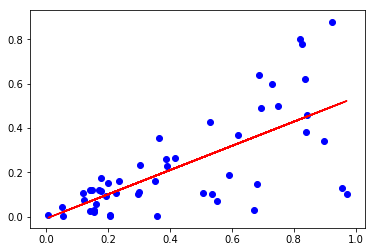

In [13]:
n = 50
x = np.random.random(n) #np.random functions are a useful way to generate data from a given distribution
y = x * np.random.random(n)

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1) #fits a polynomial function to the data, deg1 poly is equivalent to linear regression
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.scatter(x, y, color='blue')
plt.show()

Now, we apply polyfit to our course evaluation data:

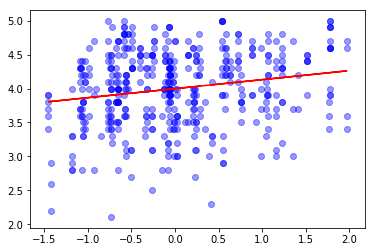

In [14]:
x = ratings_df['beauty']
y = ratings_df['course_eval']

fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')
plt.scatter(x, y, color='blue', alpha=.40)
plt.show()

** Create your own scatter with a linear fit** you could generate your own data or use `ratings_df`

# Case Study
Now, we challenge everyone to analyse their own data using the tools we have covered!  Find a dataset on the Machine Learning Repository https://archive.ics.uci.edu/ml/datasets.html or elsewhere.  Be warned: not every dataset is already formatted conveniently - setting up your data frame is not always straightforward, but is always key.  Below, we demonstrate a case where the column labels were not included in the original set.  Feel free to use Google for any supplemental information you might want to conduct your study, ask questions, and collaborate with each other.  Good luck!!

In [15]:
flag_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data', header=None)

In [16]:
flag_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [17]:
colnames = [
    'name','landmass','zone','area','population','language','religion','bars','stripes', 'colours','red','green',
    'blue','gold','white','black','orange','mainhue','circles','crosses', 'saltires','quarters', 
    'sunstars', 'crescent','triangle', 'icon', 'animate', 'text', 'topleft','botright']
    

In [18]:
flag_df.columns = colnames
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
